In [1]:
!pip install numpy
!pip install pandas
!pip install mglearn

In [2]:
import numpy as np
import pandas as pd
import mglearn
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
dataset_test30 = pd.read_csv("test30_augmented.csv")
print(dataset_test30.shape)

(6000000, 34)


In [4]:
df = pd.DataFrame(dataset_test30)

Features with 0 values will be deleted

In [5]:
new_dataset_test30 = df.drop(columns = ['mqtt.conack.flags.reserved', 'mqtt.conack.flags.sp', 'mqtt.conflag.qos', 'mqtt.conflag.reserved', 'mqtt.conflag.retain', 
             'mqtt.conflag.willflag', 'mqtt.retain', 'mqtt.sub.qos', 'mqtt.suback.qos', 'mqtt.willmsg', 'mqtt.willmsg_len', 
             'mqtt.willtopic', 'mqtt.willtopic_len'])

Correlacionamento de colunas:

mqtt.len x tcp.flags

In [6]:
print(new_dataset_test30.shape)

(6000000, 21)


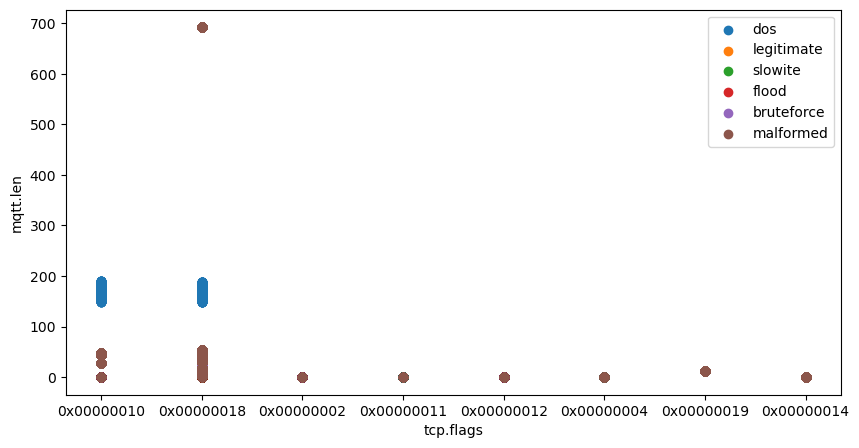

In [7]:
fig, ax = plt.subplots(figsize=(10,5))

for i in new_dataset_test30['target'].unique():
    classes = new_dataset_test30[new_dataset_test30['target'] == i]
    plt.scatter(classes['tcp.flags'], classes['mqtt.len'], label=i)


plt.xlabel('tcp.flags')
plt.ylabel('mqtt.len')
plt.title('')
plt.legend()
plt.show()

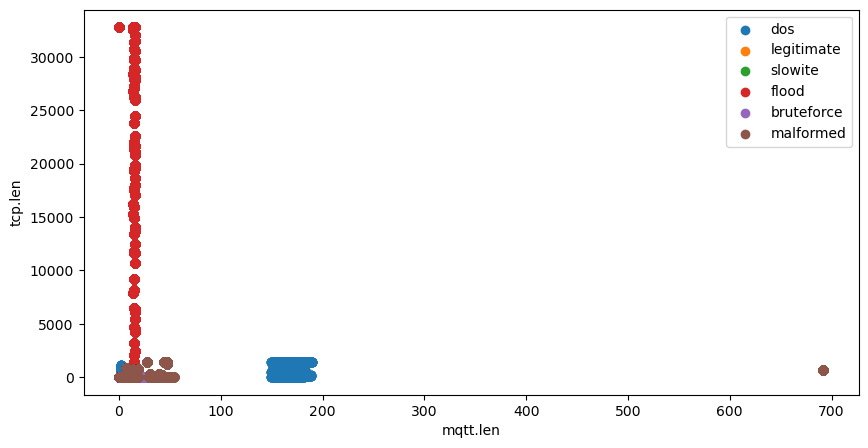

In [8]:
fig, ax = plt.subplots(figsize=(10,5))

for i in new_dataset_test30['target'].unique():
    classes = new_dataset_test30[new_dataset_test30['target'] == i]
    plt.scatter(classes['mqtt.len'],classes['tcp.len'], label=i)


plt.xlabel('mqtt.len')
plt.ylabel('tcp.len')
plt.title('')
plt.legend()
plt.show()

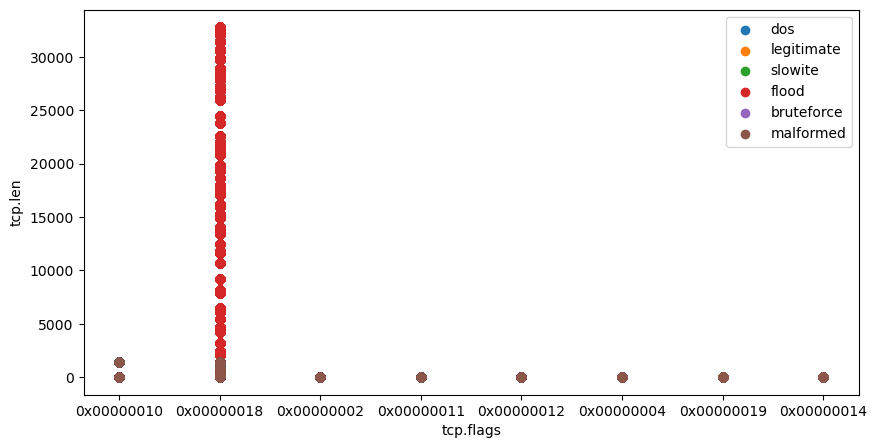

In [9]:
fig, ax = plt.subplots(figsize=(10,5))

for i in new_dataset_test30['target'].unique():
    classes = new_dataset_test30[new_dataset_test30['target'] == i]
    plt.scatter(classes['tcp.flags'], classes['tcp.len'], label=i)


plt.xlabel('tcp.flags')
plt.ylabel('tcp.len')
plt.title('')
plt.legend()
plt.show()

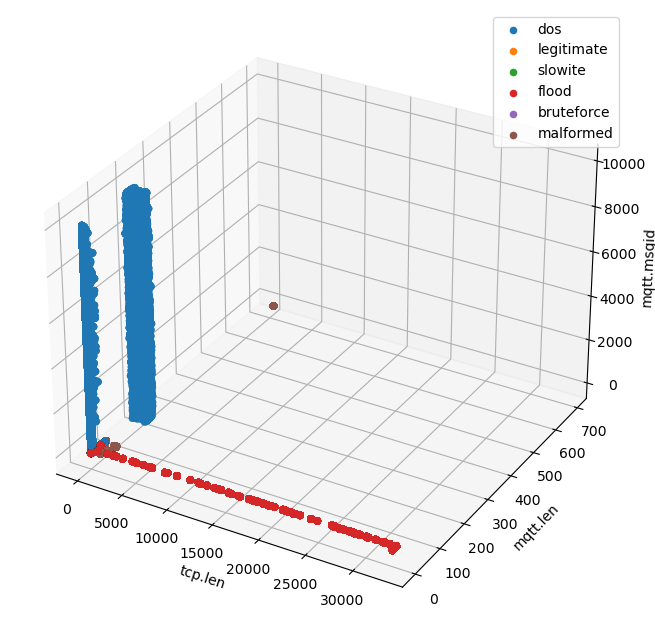

In [10]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')



for i in new_dataset_test30['target'].unique():
    classes = new_dataset_test30[new_dataset_test30['target'] == i]
    ax.scatter(classes['tcp.len'], classes['mqtt.len'], classes['mqtt.msgid'], label=i)


ax.set_xlabel('tcp.len')
ax.set_ylabel('mqtt.len')
ax.set_zlabel('mqtt.msgid')
plt.title('')
plt.legend()
plt.show()

The 3D graphic does not plot string values of the column 'tcp.flags' because the data has two types of digits.

Then, the following code convert the 'tcp.flags' colmun data to a string with the name of the correponding flag.

In [ ]:
for number, row in new_dataset_test30.iterrows():                     # number represents de index of the column
    if row['tcp.flags'] == "0x00000010":                              # row represents the data of the row
        new_dataset_test30.at[number, 'tcp.flags'] = "ACK"            # the method at. update the row to the new value
    elif row['tcp.flags'] == "0x00000002":
        new_dataset_test30.at[number, 'tcp.flags'] = "SYN"
    elif row['tcp.flags'] == "0x00000012":
        new_dataset_test30.at[number, 'tcp.flags'] = "SYN ACK"
    elif row['tcp.flags'] == "0x00000011":
        new_dataset_test30.at[number, 'tcp.flags'] = "FIN ACK"
    elif row['tcp.flags'] == "0x00000004":
        new_dataset_test30.at[number, 'tcp.flags'] = "RST"
    elif row['tcp.flags'] == "0x00000014":
        new_dataset_test30.at[number, 'tcp.flags'] = "RST ACK"
    elif row['tcp.flags'] == "0x00000018":
        new_dataset_test30.at[number, 'tcp.flags'] = "PSH ACK"
    elif row['tcp.flags'] == "0x00000019":
        new_dataset_test30.at[number, 'tcp.flags'] = "ZERO"

In [ ]:
print(new_dataset_test30['tcp.flags'].unique())

In [ ]:
for number, row in new_dataset_test30.iterrows():                     # number represents de index of the column
    if row['tcp.flags'] == "ACK":                                     # row represents the data of the row
        new_dataset_test30.at[number, 'tcp.flags'] = 1                # the method at. update the row to the new value
    elif row['tcp.flags'] == "SYN":
        new_dataset_test30.at[number, 'tcp.flags'] = 2
    elif row['tcp.flags'] == "SYN ACK":
        new_dataset_test30.at[number, 'tcp.flags'] = 3
    elif row['tcp.flags'] == "FIN ACK":
        new_dataset_test30.at[number, 'tcp.flags'] = 4
    elif row['tcp.flags'] == "RST":
        new_dataset_test30.at[number, 'tcp.flags'] = 5
    elif row['tcp.flags'] == "RST ACK":
        new_dataset_test30.at[number, 'tcp.flags'] = 6
    elif row['tcp.flags'] == "PSH ACK":
        new_dataset_test30.at[number, 'tcp.flags'] = 7
    elif row['tcp.flags'] == "ZERO":
        new_dataset_test30.at[number, 'tcp.flags'] = 0

In [ ]:
print(new_dataset_test30['tcp.flags'].unique())

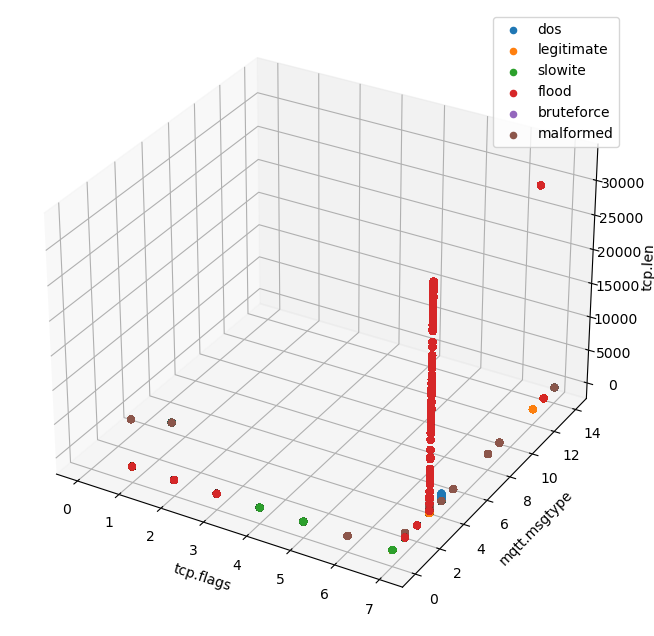

In [18]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')



for i in new_dataset_test30['target'].unique():
    classes = new_dataset_test30[new_dataset_test30['target'] == i]
    ax.scatter(classes['tcp.flags'], classes['mqtt.msgtype'], classes['tcp.len'], label=i)


ax.set_xlabel("tcp.flags")
ax.set_ylabel("mqtt.msgtype")
ax.set_zlabel("tcp.len")
ax.set_title('')
ax.legend(loc='upper right')
plt.show()

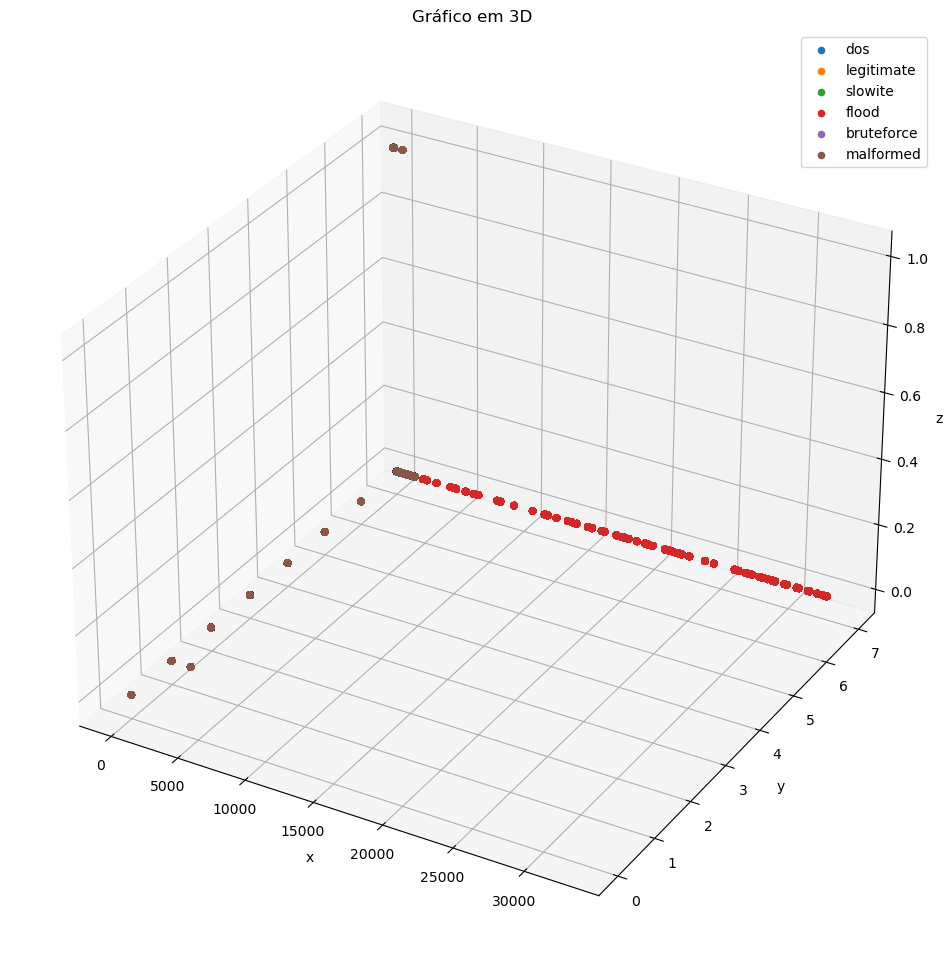

In [19]:
# malformed está diretamente relacioada a feature tcp.flags quando o tamanho do cabeçalho tcp é 0



fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111, projection='3d')

if (new_dataset_test30['tcp.flags'] == 1):
    new_dataset_test30['tcp.flags']


for i in new_dataset_test30['target'].unique():
    class_value = new_dataset_test30[new_dataset_test30['target'] == i]
    ax.scatter(class_value['tcp.len'], class_value['tcp.flags'], class_value['mqtt.conflag.cleansess'], label=i)

ax.set_title('Gráfico em 3D')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
plt.show()

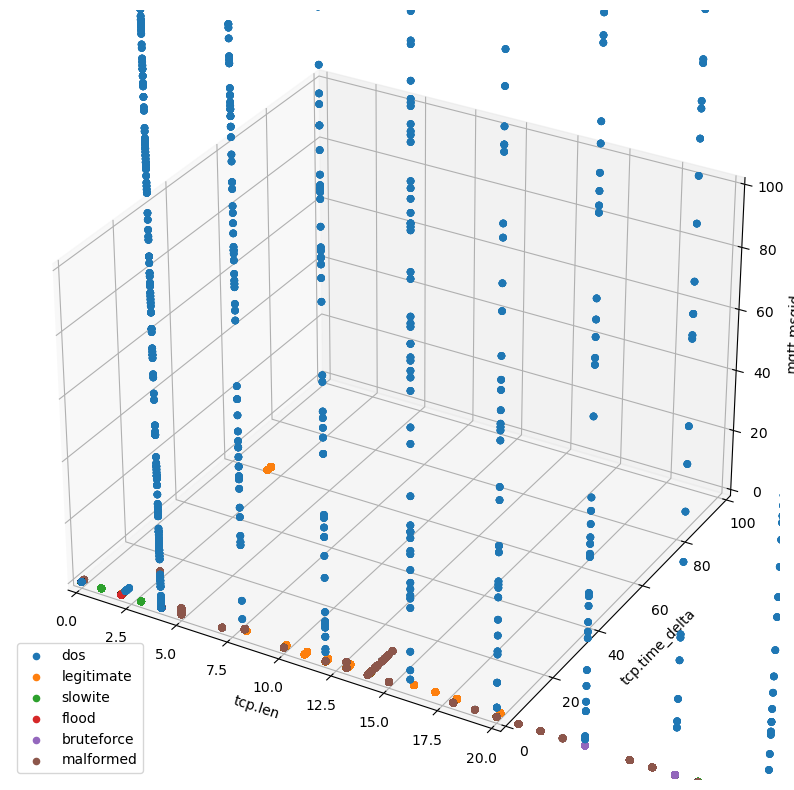

In [22]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')



for i in new_dataset_test30['target'].unique():
    classes = new_dataset_test30[new_dataset_test30['target'] == i]
    ax.scatter(classes['tcp.len'], classes['tcp.time_delta'], classes['mqtt.msgid'], label=i)


ax.set_xlabel('tcp.len')
ax.set_ylabel('tcp.time_delta')
ax.set_zlabel('mqtt.msgid')

ax.set_xlim(0, 20)
ax.set_ylim(0, 100)
ax.set_zlim(0, 100)


plt.title('')
plt.legend()
plt.show()